In [ ]:
# Beyond Hello World, A Computer Vision Example
# In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. 
# This gave an explicit example of learned behavior. 
# Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, 
# instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, 
# and extending that for all values.

# But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? 
# Let's take a look at a scenario where we can recognize different items of clothing, 
# trained from a dataset containing 10 different types.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.  

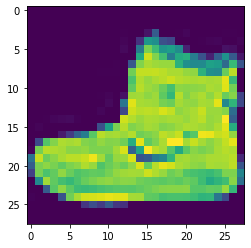

In [6]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [9]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 713us/step - loss: 1.0460 - accuracy: 0.6745
Epoch 2/5
1875/1875 [==============================] - 1s 716us/step - loss: 0.6251 - accuracy: 0.7750
Epoch 3/5
1875/1875 [==============================] - 1s 738us/step - loss: 0.5525 - accuracy: 0.8034
Epoch 4/5
1875/1875 [==============================] - 1s 729us/step - loss: 0.5105 - accuracy: 0.8198
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4841 - accuracy: 0.8292


In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 696us/step - loss: 0.5032 - accuracy: 0.8202


[0.5032288432121277, 0.8202000260353088]

In [11]:
classifications = model.predict(test_images)

print(classifications[0])

[1.5489810e-06 1.1539666e-07 8.0577229e-06 1.0114390e-05 8.5457132e-06 8.9590877e-02 9.5062487e-06 4.8613063e-01 5.4913955e-03 4.1874918e-01]


In [12]:
print(test_labels[0])

9


In [13]:
# ********************practice 2*************************

# Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. 
# What different results do you get for loss, training time etc? Why do you think that's the case?

In [14]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
11493376/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1851: 0s - l
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0725
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0470
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0337
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0811
[3.3261724e-09 1.3326944e-09 1.9228805e-08 5.6094308e-05 4.2427401e-13 1.0401825e-09 1.4241263e-11 9.9993396e-01 8.1531965e-08 9.7637776e-06]
7


In [15]:
# ****************practice 3***************

# What would happen if you remove the Flatten() layer. Why do you think that's the case?
# You get an error about the shape of the data. 
# It may seem vague right now, but it reinforces the rule of thumb that the first layer 
# in your network should be the same shape as your data. 
# Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, 
# so it makes more sense to 'flatten' that 28,28 into a 784x1. 
# Instead of wriitng all the code to handle that ourselves, 
# we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, 
# they'll automatically be flattened for us.

In [16]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5


ValueError: in user code:

    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\keras\losses.py:1566 sparse_categorical_crossentropy
        return K.sparse_categorical_crossentropy(
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\keras\backend.py:4782 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\ops\nn_ops.py:4175 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    D:\SoftWare\Anaconda3\envs\TF\lib\site-packages\tensorflow\python\ops\nn_ops.py:4088 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).


In [17]:
# ****************practice 4***************

# Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? 
# For example, try training the network with 5
# You get an error as soon as it finds an unexpected value. 
# Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. 
# In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [20]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5


InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 6 4 2 8 0 6 1 5 2 0 7 5 1 4 0 8 1 8 1 9 1 5 8 1 4 3 0 7 5 8 1 7
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-20-04e5ea87fa1d>:18) ]] [Op:__inference_train_function_36787]

Function call stack:
train_function


In [21]:
# *****************Exercise 5******************

# Consider the effects of additional layers in the network. 
# What will happen if you add another layer between the one with 512 and the final layer with 10.
# Ans: There isn't a significant impact -- because this is relatively simple data. 
# For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), 
# extra layers are often necessary.

In [22]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1863
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0782
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0544
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0407
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1261
[5.3618426e-10 4.4435402e-09 1.6700027e-09 9.9690221e-09 9.4896827e-11 3.3684630e-13 2.1490576e-14 9.9999332e-01 2.2584641e-11 6.6533175e-06]
7


In [23]:
# *************Exercise 6**************

# Consider the impact of training for more or less epochs. Why do you think that would be the case?
# Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs 
# -- you might see the loss value stops decreasing, and sometimes increases. 
# This is a side effect of something called 'overfitting' which you can learn about [somewhere] and 
# it's something you need to keep an eye out for when training neural networks. 
# There's no point in wasting your time training if you aren't improving your loss, right! :)

In [24]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.3.0
Epoch 1/30
1875/1875 [==============================] - 2s 979us/step - loss: 0.2550 0s - lo
Epoch 2/30
1875/1875 [==============================] - 2s 903us/step - loss: 0.1097
Epoch 3/30
1875/1875 [==============================] - 1s 776us/step - loss: 0.0765
Epoch 4/30
1875/1875 [==============================] - 1s 786us/step - loss: 0.0575
Epoch 5/30
1875/1875 [==============================] - 2s 858us/step - loss: 0.0440
Epoch 6/30
1875/1875 [==============================] - 1s 745us/step - loss: 0.0343
Epoch 7/30
1875/1875 [==============================] - 1s 794us/step - loss: 0.0279
Epoch 8/30
1875/1875 [==============================] - 1s 740us/step - loss: 0.0225
Epoch 9/30
1875/1875 [==============================] - 1s 732us/step - loss: 0.0188
Epoch 10/30
1875/1875 [==============================] - 1s 727us/step - loss: 0.0155
Epoch 11/30
1875/1875 [==============================] - 1s 751us/step - loss: 0.0117
Epoch 12/30
1875/1875 [==========================

In [25]:
# ***************Exercise 7*****************
# Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. 
# What would be the impact of removing that? 
# Here's the complete code to give it a try. Why do you think you get different results?

In [26]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1984A: 0s - 
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0796
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0535
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0378
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0722
[3.6201970e-09 8.5410867e-10 2.5455509e-07 1.6549557e-04 1.4500589e-12 4.8534712e-08 5.0738693e-14 9.9979752e-01 2.5379721e-08 3.6723326e-05]
7


In [27]:
# ****************Exercise 8*****************
# Earlier when you trained for extra epochs you had an issue where your loss might change. 
# It might have taken a bit of time for you to wait for the training to do that, 
# and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?
# ' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, 
# why sit around waiting for it to finish a lot more epochs....So how would you fix that? 
# Like any other program...you have callbacks! Let's see them in action...

In [32]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['mae','acc'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


2.3.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4747 - mae: 4.4200 - acc: 0.8302
Epoch 2/5
1863/1875 [============================>.] - ETA: 0s - loss: 0.3579 - mae: 4.4187 - acc: 0.8696-  - ETA: 0s - loss: 0.3587 - mae: 4.4215 - acc: 0.
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3576 - mae: 4.4200 - acc: 0.8697
